In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
import numpy as np
plt.rcParams['figure.dpi']=200

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [4]:
def get_section_results(file, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == X_label:
                X.append(v.simple_value)
            elif v.tag == Y_label:
                Y.append(v.simple_value)
    return X, Y

def getXY(exp_name, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    logdir = '/home/harvey/Documents/cs285/CS285-Project/data/%s/events*'%exp_name
    eventfile = glob.glob(logdir)[0]
    X, Y = get_section_results(eventfile, X_label=X_label, Y_label=Y_label)
    return X, Y

def getXYpeer(exp_name, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn', peer_num=10):
    result = []
    for i in range(peer_num):
        Xi, Yi = getXY(exp_name, "Agent%d_"%i+X_label, "Agent%d_"%i+Y_label)
        if Xi and Yi:
            result.append((Xi, Yi))
    return result

def check(exp_name):
    X, Y = getXY(exp_name)
    for i, (x, y) in enumerate(zip(X, Y)):
        print('Iteration {:d} | Train steps: {:d} | Return: {}'.format(i, int(x), y))

In [5]:
sacv1 = "sac_peer_2_agents_HalfCheetah-v4_11-12-2022_19-11-52"
sacv2 = "sac_peer_2_agents_v2_HalfCheetah-v4_11-12-2022_19-46-11"
ensemble2 = "sac_ensemble_2_agents_1000_iter_HalfCheetah-v4_09-12-2022_23-23-12"

baseline = "sac_hw3q6_hprm_HalfCheetah-v4_28-11-2022_00-11-32"
hw3q6 = "q6b_sac_HalfCheetah_actorfreq10_fixed2_HalfCheetah-v4_20-10-2022_13-00-19"

v2exp1 = "peersac_v2_2agents_HalfCheetah-v4_12-12-2022_02-33-51"
v2exp2 = "peersac_v2_3agents_advdim8_HalfCheetah-v4_12-12-2022_04-31-40"
v2exp3 = "peersac_v2_3agents_eps0.7_HalfCheetah-v4_12-12-2022_05-10-19"
v2exp4 = "peersac_v2_3agents_HalfCheetah-v4_12-12-2022_03-12-34"
v2exp5 = "peersac_v2_3agents_temp0.5_HalfCheetah-v4_12-12-2022_05-48-42"
v2exp6 = "peersac_v2_5agents_HalfCheetah-v4_12-12-2022_03-51-57"

# sac_hw3q6 = "sac_hw3q6_hprm_HalfCheetah-v4_28-11-2022_00-11-32"
# sac_hw3q6a3_alt = "sac_hw3q6_hprm_3agents_HalfCheetah-v4_28-11-2022_00-26-21"
# sac_hw3q6a3 = "sac_hw3q6_hprm_3agents_HalfCheetah-v4_28-11-2022_11-51-29"

# sac_temp0p1 = "sac_peer2_agents_rpb20000_temp0.1_HalfCheetah-v4_09-12-2022_02-17-56"
# sac_temp0p5 = "sac_peer2_agents_rpb20000_temp0.5_HalfCheetah-v4_09-12-2022_02-17-38"
# check(exp6)

### SAC Peer Learning HW3 comparison experiment

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


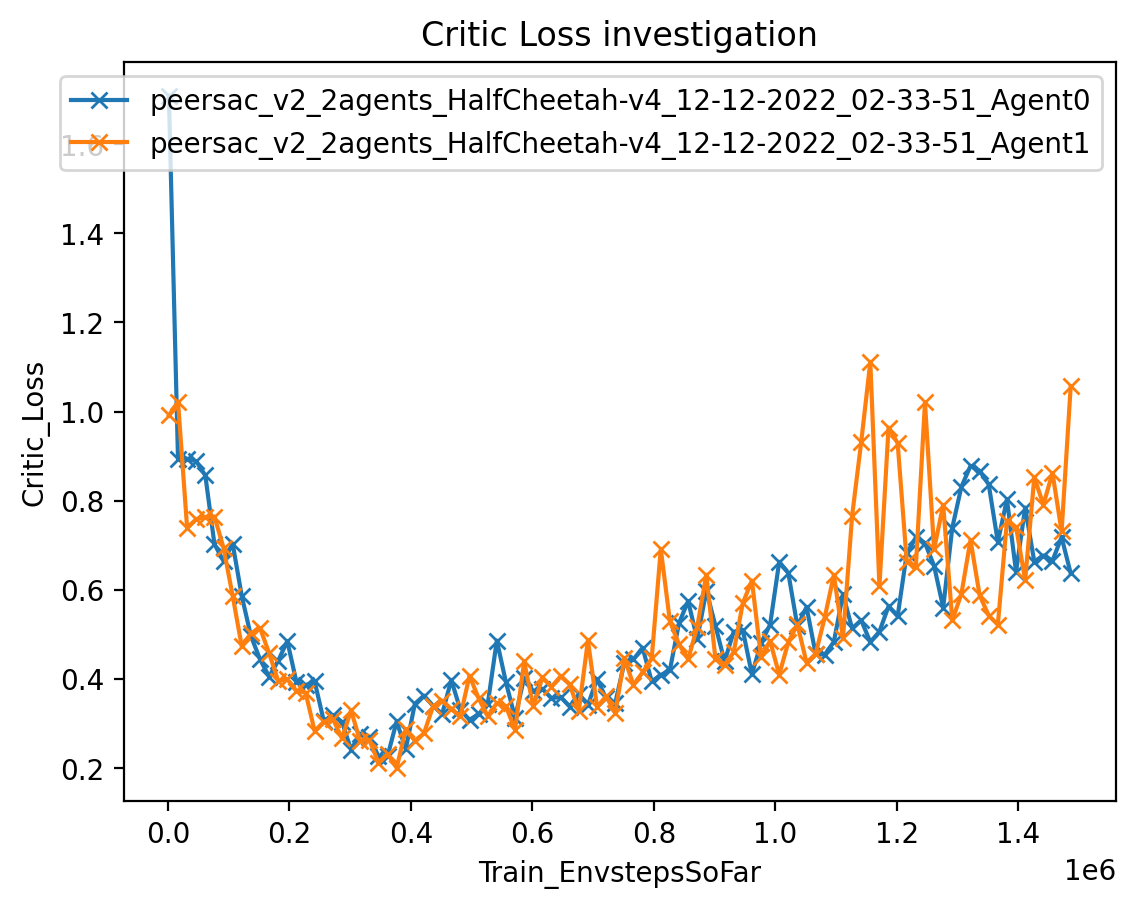

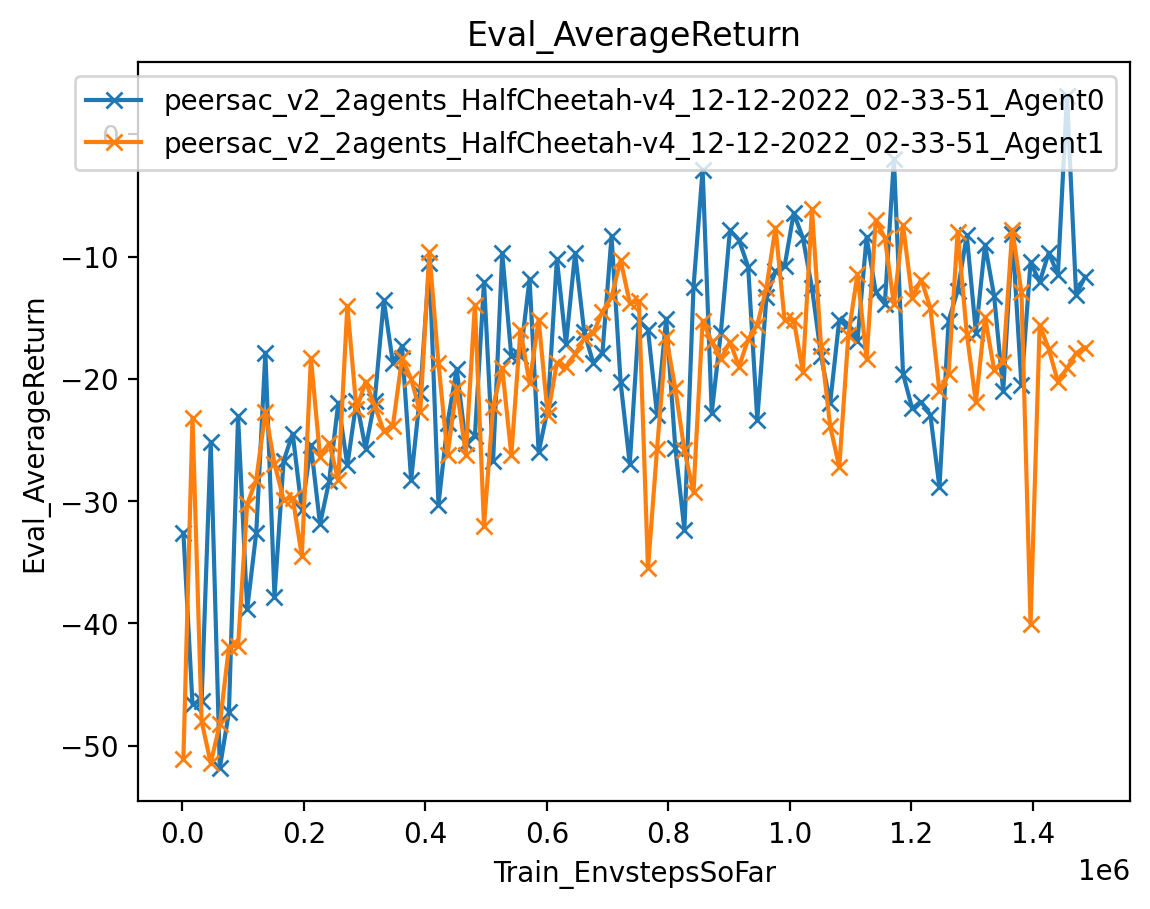

In [6]:
exp_names = [v2exp1]

X_label='Train_EnvstepsSoFar'
Y_label='Critic_Loss'
for exp_name in exp_names:
    series = getXYpeer(exp_name, X_label, Y_label)
    for i in range(len(series)):
        X, Y = series[i]
        plt.plot(X, Y, marker='x', label=exp_name+"_Agent%d"%i) 
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()
plt.title("Critic Loss investigation")
plt.show()

X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'
for exp_name in exp_names:
    series = getXYpeer(exp_name, X_label, Y_label)
    for i in range(len(series)):
        X, Y = series[i]
        plt.plot(X, Y, marker='x', label=exp_name+"_Agent%d"%i) 
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()
plt.title("Eval_AverageReturn")
plt.show()

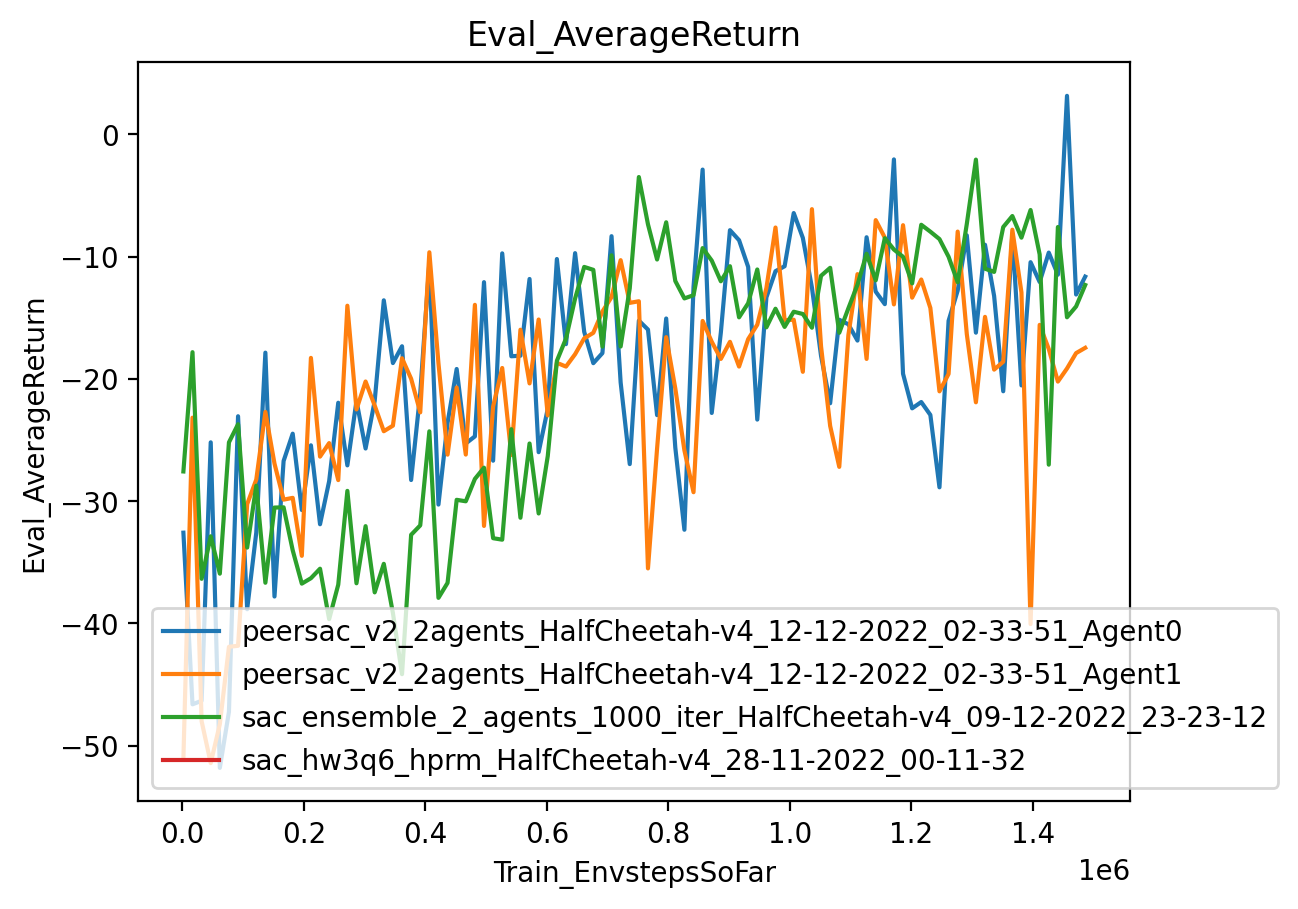

In [7]:
exp_names = [v2exp1, ensemble2, baseline] # hw3q6

X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'
for exp_name in exp_names:
    if "peer" in exp_name:
        series = getXYpeer(exp_name, X_label, Y_label)
        for i in range(len(series)):
            X, Y = series[i]
            plt.plot(X, Y, label=exp_name+"_Agent%d"%i) 
    else:
        X, Y = getXY(exp_name, X_label, Y_label)
        plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()
plt.title("Eval_AverageReturn")
plt.show()

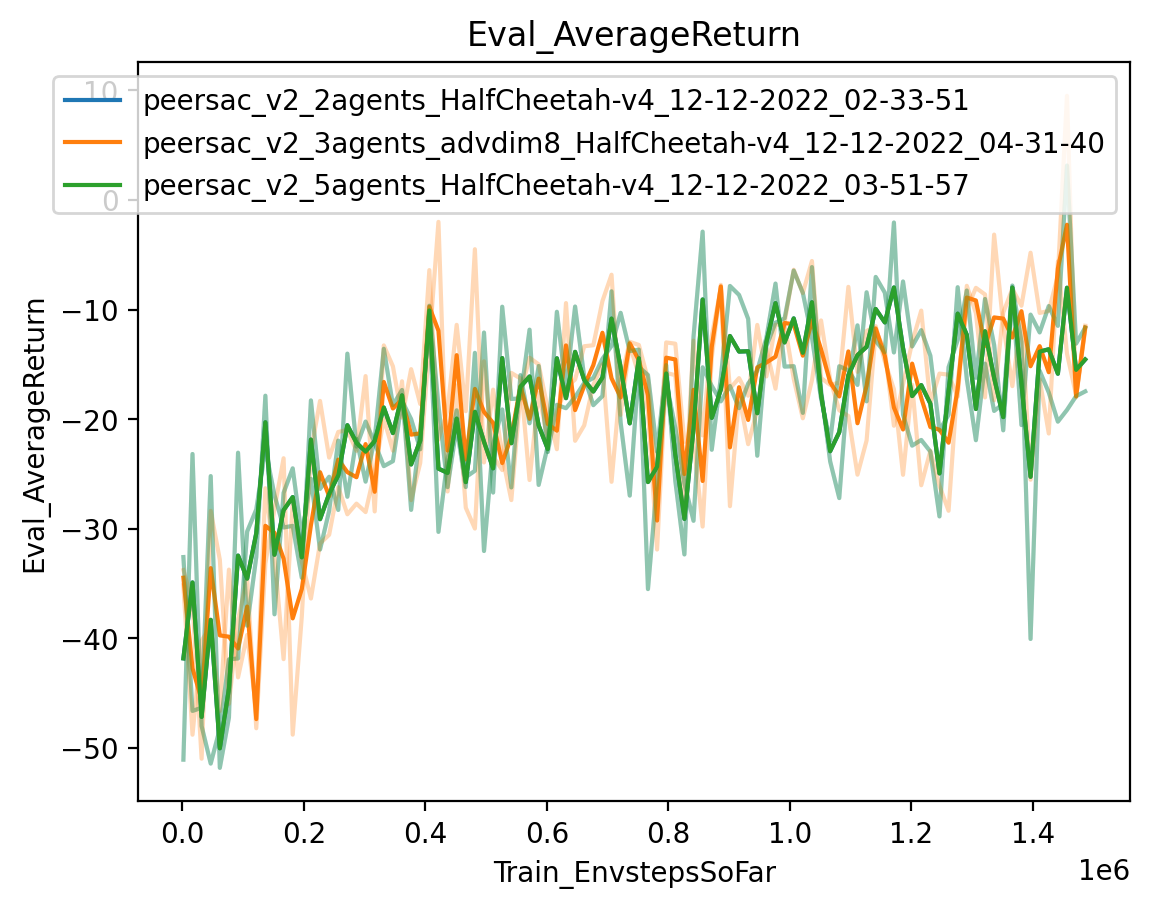

In [10]:
exp_names = [v2exp1, v2exp2, v2exp6] # hw3q6, baseline, v2exp3, v2exp4, v2exp5, ensemble2

X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'
for ci, exp_name in enumerate(exp_names):
    if "peer" in exp_name:
        series = getXYpeer(exp_name, X_label, Y_label)
        for i in range(len(series)):
            X, Y = series[i]
            plt.plot(X, Y, alpha=0.3, c=colors[ci]) 
        Y_avg = np.mean([Y for X, Y in series], axis=0)
        plt.plot(X, Y_avg, label=exp_name, c=colors[ci]) 
    else:
        X, Y = getXY(exp_name, X_label, Y_label)
        plt.plot(X, Y, label=exp_name, c=colors[ci])
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()
plt.title("Eval_AverageReturn")
plt.show()